In [24]:
import tensorflow as tf
tf.reset_default_graph()

#init_w = tf.keras.initializers.constant(7.0)
#init_w = tf.keras.initializers.ones()
#init_w = tf.keras.initializers.zeros()
init_w = tf.keras.initializers.identity()
w = tf.get_variable('w', (5, 3), tf.float32, init_w)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    w_run = sess.run(w)
print(w_run)
print(w)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 0.]
 [0. 0. 0.]]
<tf.Variable 'w:0' shape=(5, 3) dtype=float32_ref>


In [23]:
g = tf.get_default_graph()
ops = g.get_operations()
for op in ops:
    for tensor in op.outputs:
        print(tensor)

Tensor("w/Initializer/eye/ones:0", shape=(3,), dtype=float32)
Tensor("w/Initializer/eye/zeros:0", shape=(3, 5), dtype=float32)
Tensor("w/Initializer/eye/set_diag:0", shape=(3, 5), dtype=float32)
Tensor("w/Initializer/mul/x:0", shape=(), dtype=float32)
Tensor("w/Initializer/mul:0", shape=(3, 5), dtype=float32)
Tensor("w:0", shape=(3, 5), dtype=float32_ref)
Tensor("w/Assign:0", shape=(3, 5), dtype=float32_ref)
Tensor("w/read:0", shape=(3, 5), dtype=float32)


<tf.Variable 'w:0' shape=(100, 100) dtype=float32_ref>
<class 'numpy.ndarray'>
(100, 100)
float32


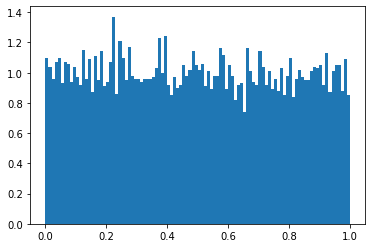

0.49432907 0.28914863


In [34]:
%matplotlib inline
import tensorflow as tf; tf.reset_default_graph()
import matplotlib.pyplot as plt
import numpy as np

#init_w = tf.keras.initializers.RandomNormal() # mean=0, std=0.05
#init_w = tf.keras.initializers.TruncatedNormal() # mean=0, (before_truncation_)std=0.05
init_w = tf.keras.initializers.RandomUniform(minval=0., maxval=1.) # minval=-0.05, maxval=0.05
w = tf.get_variable('w', (100,100), tf.float32, init_w)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    print(w)
    w_run = sess.run(w)
    print(type(w_run))
    print(w_run.shape)
    print(w_run.dtype)
    
plt.hist(w_run.reshape((-1,)), bins=100, density=True)
plt.show()
print(w_run.reshape((-1,)).mean(), w_run.reshape((-1,)).std())

In [31]:
g = tf.get_default_graph()
ops = g.get_operations()
for op in ops:
    for tensor in op.outputs:
        print(tensor)

Tensor("w/Initializer/random_normal/shape:0", shape=(2,), dtype=int32)
Tensor("w/Initializer/random_normal/mean:0", shape=(), dtype=float32)
Tensor("w/Initializer/random_normal/stddev:0", shape=(), dtype=float32)
Tensor("w/Initializer/random_normal/RandomStandardNormal:0", shape=(100, 100), dtype=float32)
Tensor("w/Initializer/random_normal/mul:0", shape=(100, 100), dtype=float32)
Tensor("w/Initializer/random_normal:0", shape=(100, 100), dtype=float32)
Tensor("w:0", shape=(100, 100), dtype=float32_ref)
Tensor("w/Assign:0", shape=(100, 100), dtype=float32_ref)
Tensor("w/read:0", shape=(100, 100), dtype=float32)


In [54]:
%matplotlib inline
import tensorflow as tf; tf.reset_default_graph()
import numpy as np
import matplotlib.pyplot as plt

init_w = tf.keras.initializers.Orthogonal()
w = tf.get_variable('w', (3,5), dtype=tf.float32, initializer=init_w)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    w_run = sess.run(w)

total_sum = 0
for i in range(3):
    for j in range(3):
        total_sum += np.abs(np.sum(w_run[i]*w_run[j]))
print(total_sum)

2.99999987334013


In [61]:
%matplotlib inline
import tensorflow as tf; tf.reset_default_graph()
import numpy as np
import matplotlib.pyplot as plt

init_w = tf.keras.initializers.Orthogonal()
w = tf.get_variable('w', (5,3), dtype=tf.float32, initializer=init_w)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    w_run = sess.run(w)

total_sum = 0
for i in range(3):
    for j in range(3):
        total_sum += np.abs(np.sum(w_run[:,i]*w_run[:,j]))
print(total_sum)

3.0000000074505806


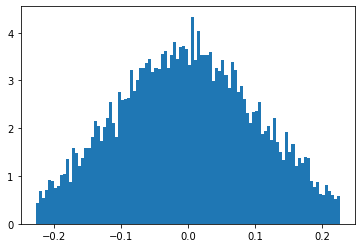

-0.002406487 0.100820564
0.1


In [60]:
%matplotlib inline
import tensorflow as tf; tf.reset_default_graph()
import numpy as np
import matplotlib.pyplot as plt

init_w = tf.keras.initializers.glorot_normal()
w = tf.get_variable('w', (100,100), dtype=tf.float32, initializer=init_w)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    w_run = sess.run(w)
    
plt.hist(w_run.reshape((-1,)), bins=100, density=True)
plt.show()
print(w_run.reshape((-1,)).mean(), w_run.reshape((-1,)).std())
print(np.sqrt(1/((100+100)/2)))

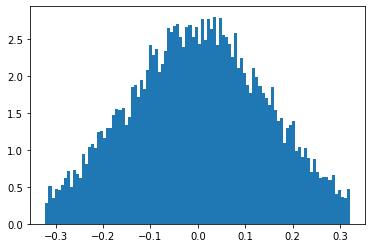

In [68]:
%matplotlib inline
import tensorflow as tf; tf.reset_default_graph()
import numpy as np
import matplotlib.pyplot as plt

#init_w = tf.keras.initializers.VarianceScaling() # lucun
#init_w = tf.keras.initializers.VarianceScaling(mode='fan_avg') # xavier
init_w = tf.keras.initializers.VarianceScaling(scale=2.0) # he
w = tf.get_variable('w', (100,100), dtype=tf.float32, initializer=init_w)
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    w_run = sess.run(w)
    
plt.hist(w_run.reshape((-1,)), bins=100, density=True)
plt.show()

In [69]:
g = tf.get_default_graph()
ops = g.get_operations()
for op in ops:
    for tensor in op.outputs:
        print(tensor)

Tensor("w/Initializer/truncated_normal/shape:0", shape=(2,), dtype=int32)
Tensor("w/Initializer/truncated_normal/mean:0", shape=(), dtype=float32)
Tensor("w/Initializer/truncated_normal/stddev:0", shape=(), dtype=float32)
Tensor("w/Initializer/truncated_normal/TruncatedNormal:0", shape=(100, 100), dtype=float32)
Tensor("w/Initializer/truncated_normal/mul:0", shape=(100, 100), dtype=float32)
Tensor("w/Initializer/truncated_normal:0", shape=(100, 100), dtype=float32)
Tensor("w:0", shape=(100, 100), dtype=float32_ref)
Tensor("w/Assign:0", shape=(100, 100), dtype=float32_ref)
Tensor("w/read:0", shape=(100, 100), dtype=float32)


In [70]:
import tensorflow as tf
import numpy as np
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [72]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [84]:
print(x_train.dtype, y_train.dtype, x_test.dtype, y_test.dtype)

uint8 uint8 uint8 uint8


In [86]:
print(np.min(x_train), np.max(x_train))

0 255


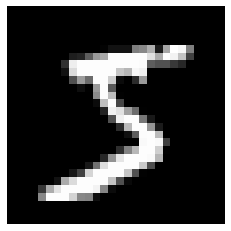

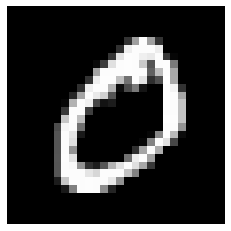

In [87]:
%matplotlib inline
import matplotlib.pyplot as plt
for i in range(2):
    plt.imshow(x_train[i], cmap='gray')
    plt.axis('off')
    plt.show()

In [88]:
x_train = x_train.astype(np.float32).reshape(-1, 28*28) / 255.0
x_test = x_test.astype(np.float32).reshape(-1, 28*28) / 255.0
y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)
x_valid, x_train = x_train[:5000], x_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]

In [89]:
def shuffle_batch(x, y, batch_size):
    rnd_idx = np.random.permutation(len(x))
    n_batches = len(x) // batch_size
    for batch_idx in np.array_split(rnd_idx, n_batches):
        x_batch, y_batch = x[batch_idx], y[batch_idx]
        yield x_batch, y_batch

In [92]:
import tensorflow as tf
import numpy as np
tf.reset_default_graph()
tf.set_random_seed(0)
np.random.seed(0)

In [93]:
lr = 0.01
epoch = 20
batch_size = 200
threshold = 1.0

In [94]:
n_inputs = 28 * 28  # MNIST
n_hidden1 = 300
n_outputs = 10

x = tf.placeholder(tf.float32, shape=(None, n_inputs), name="x")
y = tf.placeholder(tf.int32, shape=(None), name="y")

hidden1 = tf.layers.dense(x, n_hidden1, activation=tf.nn.relu, name="hidden1")
logits = tf.layers.dense(hidden1, n_outputs, name="outputs")

Instructions for updating:
Use keras.layers.Dense instead.
Instructions for updating:
Please use `layer.__call__` method instead.


In [95]:
g = tf.get_default_graph()
ops = g.get_operations()
for op in ops:
    for tensor in op.outputs:
        print(tensor)

Tensor("x:0", shape=(?, 784), dtype=float32)
Tensor("y:0", dtype=int32)
Tensor("hidden1/kernel/Initializer/random_uniform/shape:0", shape=(2,), dtype=int32)
Tensor("hidden1/kernel/Initializer/random_uniform/min:0", shape=(), dtype=float32)
Tensor("hidden1/kernel/Initializer/random_uniform/max:0", shape=(), dtype=float32)
Tensor("hidden1/kernel/Initializer/random_uniform/RandomUniform:0", shape=(784, 300), dtype=float32)
Tensor("hidden1/kernel/Initializer/random_uniform/sub:0", shape=(), dtype=float32)
Tensor("hidden1/kernel/Initializer/random_uniform/mul:0", shape=(784, 300), dtype=float32)
Tensor("hidden1/kernel/Initializer/random_uniform:0", shape=(784, 300), dtype=float32)
Tensor("hidden1/kernel:0", shape=(784, 300), dtype=float32_ref)
Tensor("hidden1/kernel/Assign:0", shape=(784, 300), dtype=float32_ref)
Tensor("hidden1/kernel/read:0", shape=(784, 300), dtype=float32)
Tensor("hidden1/bias/Initializer/zeros:0", shape=(300,), dtype=float32)
Tensor("hidden1/bias:0", shape=(300,), dtyp

In [1]:
import tensorflow as tf
import numpy as np
tf.reset_default_graph()

In [2]:
n_inputs = 2
n_hidden1 = 3

In [3]:
original_w = np.array([[1., 2., 3.], [4., 5., 6.]]) # Load the weights from the other framework
original_b = np.array([7., 8., 9.])                 # Load the biases from the other framework

In [4]:
x = tf.placeholder(tf.float32, shape=(None, n_inputs), name="x")
hidden1 = tf.layers.dense(x, n_hidden1, name="hidden1")

Instructions for updating:
Use keras.layers.Dense instead.
Instructions for updating:
Please use `layer.__call__` method instead.


In [110]:
g = tf.get_default_graph()
ops = g.get_operations()
for op in ops:
    for tensor in op.outputs:
        print(tensor)

Tensor("x:0", shape=(?, 2), dtype=float32)
Tensor("hidden1/kernel/Initializer/random_uniform/shape:0", shape=(2,), dtype=int32)
Tensor("hidden1/kernel/Initializer/random_uniform/min:0", shape=(), dtype=float32)
Tensor("hidden1/kernel/Initializer/random_uniform/max:0", shape=(), dtype=float32)
Tensor("hidden1/kernel/Initializer/random_uniform/RandomUniform:0", shape=(2, 3), dtype=float32)
Tensor("hidden1/kernel/Initializer/random_uniform/sub:0", shape=(), dtype=float32)
Tensor("hidden1/kernel/Initializer/random_uniform/mul:0", shape=(2, 3), dtype=float32)
Tensor("hidden1/kernel/Initializer/random_uniform:0", shape=(2, 3), dtype=float32)
Tensor("hidden1/kernel:0", shape=(2, 3), dtype=float32_ref)
Tensor("hidden1/kernel/Assign:0", shape=(2, 3), dtype=float32_ref)
Tensor("hidden1/kernel/read:0", shape=(2, 3), dtype=float32)
Tensor("hidden1/bias/Initializer/zeros:0", shape=(3,), dtype=float32)
Tensor("hidden1/bias:0", shape=(3,), dtype=float32_ref)
Tensor("hidden1/bias/Assign:0", shape=(3,)

In [111]:
tf.get_collection('trainable_variables')

[<tf.Variable 'hidden1/kernel:0' shape=(2, 3) dtype=float32_ref>,
 <tf.Variable 'hidden1/bias:0' shape=(3,) dtype=float32_ref>]

In [5]:
# g = tf.get_default_graph()
# w = g.get_tensor_by_name('hidden1/kernel:0')
# b = g.get_tensor_by_name('hidden1/bias:0')
# w_placeholder = tf.placeholder(tf.float32, shape=(n_inputs, n_hidden1))
# b_placeholder = tf.placeholder(tf.float32, shape=n_hidden1)
# original_w = np.array([[1., 2., 3.], [4., 5., 6.]]) 
# original_b = np.array([7., 8., 9.])   
# assign_w = tf.assign(w, w_placeholder)
# assign_b = tf.assign(b, b_placeholder)

g = tf.get_default_graph()
w_placeholder = g.get_operation_by_name("hidden1/kernel/Assign").inputs[1]
b_placeholder = g.get_operation_by_name("hidden1/bias/Assign").inputs[1]

w = g.get_tensor_by_name('hidden1/kernel:0')
b = g.get_tensor_by_name('hidden1/bias:0')

In [6]:
init = tf.global_variables_initializer()

In [7]:
with tf.Session() as sess:
    #sess.run(init)
    feed_dict = {w_placeholder: original_w, b_placeholder: original_b}
    sess.run(init, feed_dict=feed_dict)
    print(sess.run([w, b]))

[array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32), array([7., 8., 9.], dtype=float32)]
